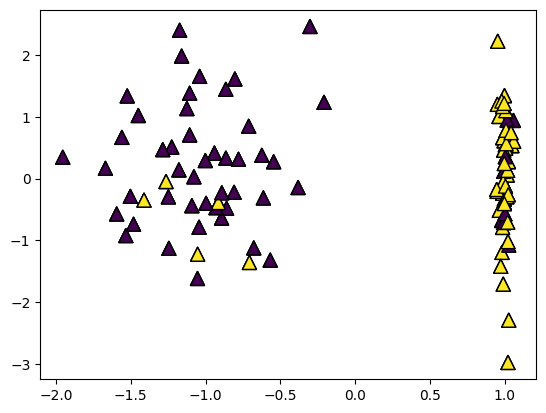

In [6]:
# 05_ml_실습04_성능_회귀평가
# 실습01

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 분류용 테스트 데이터 생성
# n_samples=데이터수, n_features=독립변수차원, n_informative=종속변수차원, n_redundant=선형조합수
# n_clusters_per_class=클래스 당 클러스터수, flip_y=노이즈(실수)
x, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1, flip_y=0.15, random_state=10)
plt.scatter(x[:, 0], x[:, 1], marker='^', c=y, s=100, edgecolors='k')
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.25, random_state=10)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [10]:
# 주요 평가
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, roc_auc_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print(f'정확도 : {accuracy:0.2f}')

precision = precision_score(y_test, y_pred)
print(f'정밀도 : {precision:0.2f}')

recall = recall_score(y_test, y_pred)
print(f'재현도 : {recall:0.2f}')

f1 = f1_score(y_test, y_pred)
print(f'f1점수 : {f1:0.2f}')

roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC_AUC : {roc_auc:0.2f}')

# Confusion Matrix
cf_matrix = pd.crosstab(y_test, y_pred, rownames=['실제'], colnames=['예측'], margins=True)
print(cf_matrix)


정확도 : 0.87
정밀도 : 0.85
재현도 : 0.85
f1점수 : 0.85
ROC_AUC : 0.87
예측    0   1  All
실제              
0    36   5   41
1     5  29   34
All  41  34   75


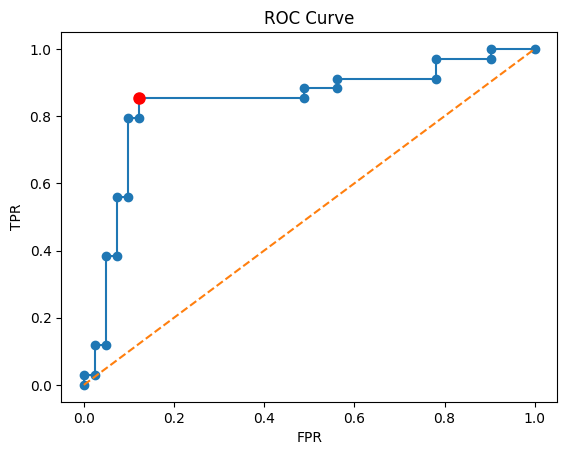

In [16]:
# ROC Curve
from sklearn.metrics import confusion_matrix, roc_curve

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# scikit-learn 분류기에서 불확실성을 추정 함수
# decision_function, predict_proba
y_proba = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, 'o-')
plt.plot([0, 1], [0, 1], '--')
plt.plot(fp/(fp+tn), tp/(tp+fn), 'ro', ms=8)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()